# Test technique python

# Probleme 1 :

In [29]:
import pandas as pd
import matplotlib.pyplot as plt


# Charger le fichier CSV en mémoire
data = pd.read_csv('test_data.csv.')
data

,user_id,age,gender,country,device,session_duration,revenue
0,1,25,F,USA,Android,20,0.5
1,2,30,M,France,iOS,25,1.2
2,3,35,F,USA,Android,40,1.5
3,4,40,M,Canada,iOS,35,2.0
4,5,45,M,USA,iOS,30,1.8
5,6,50,F,France,Android,45,2.2
6,7,55,M,USA,iOS,50,2.5
7,8,60,F,Canada,Android,60,3.0
8,9,65,M,USA,iOS,55,2.8
9,10,70,F,France,Android,70,3.5


In [31]:
# Calculer le nombre d'utilisateurs dans chaque pays et afficher les résultats sous forme de tableau
count_by_country = pd.DataFrame(data['country'].value_counts())
count_by_country

,country
USA,6
France,3
Canada,3


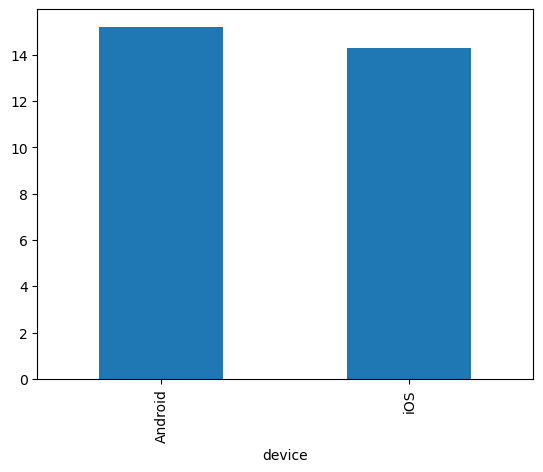

In [10]:
# Calculer le revenu total généré par les utilisateurs de chaque type de dispositif et afficher les résultats sous forme de graphique
revenue_by_device = data.groupby('device')['revenue'].sum()
revenue_by_device.plot(kind='bar')
plt.show()

In [16]:
# Identifier les utilisateurs dont la durée moyenne des sessions est supérieure à 30 minutes et le revenu moyen est inférieur à 1 dollar par minute. Afficher les résultats sous forme de tableau
high_session_duration_low_revenue = pd.DataFrame(data[(data['session_duration'] > 30) & (data['revenue'] / data['session_duration'] < 1)])
high_session_duration_low_revenue


,user_id,age,gender,country,device,session_duration,revenue
2,3,35,F,USA,Android,40,1.5
3,4,40,M,Canada,iOS,35,2.0
5,6,50,F,France,Android,45,2.2
6,7,55,M,USA,iOS,50,2.5
7,8,60,F,Canada,Android,60,3.0
8,9,65,M,USA,iOS,55,2.8
9,10,70,F,France,Android,70,3.5
10,11,75,M,USA,iOS,75,4.0
11,12,80,F,Canada,Android,80,4.5


# Problème 2 :

In [18]:
# Chargement des données à partir du fichier CSV
data = pd.read_csv('sales_data.csv')
data

,date,customer_id,product,category,amount
0,2022-01-01,1,Product A,Category 1,100.0
1,2022-01-02,2,Product B,Category 1,200.0
2,2022-01-03,3,Product C,Category 2,150.0
3,2022-01-04,4,Product D,Category 3,50.0
4,2022-01-05,5,Product E,Category 3,75.0
5,2022-01-06,6,Product F,Category 2,125.0
6,2022-01-07,7,Product G,Category 1,300.0
7,2022-01-08,8,Product H,Category 2,175.0
8,2022-01-09,9,Product I,Category 3,25.0
9,2022-01-10,10,Product J,Category 1,250.0


In [19]:
# Vérification des valeurs manquantes
if data.isnull().values.any():
    print("Il y a des valeurs manquantes dans les données.")
else:
    print("Il n'y a pas de valeurs manquantes dans les données.")

Il n'y a pas de valeurs manquantes dans les données.


In [20]:
# Calcul du chiffre d'affaires total pour l'année
total_revenue = data['amount'].sum()
print(f"Le chiffre d'affaires total pour l'année est de {total_revenue} dollars.")


Le chiffre d'affaires total pour l'année est de 3900.0 dollars.


In [21]:

# Calcul du nombre total de transactions pour l'année
total_transactions = data['customer_id'].count()
print(f"Le nombre total de transactions pour l'année est de {total_transactions}.")



Le nombre total de transactions pour l'année est de 26.


In [24]:
# Calcul de la moyenne, du minimum et du maximum des montants de transaction pour chaque catégorie de produit
category_stats = pd.DataFrame(data.groupby('category')['amount'].agg(['mean', 'min', 'max']))
print("Statistiques des montants de transaction pour chaque catégorie de produit :")
category_stats



Statistiques des montants de transaction pour chaque catégorie de produit :


,mean,min,max
category,,,
Category 1,203.846154,100.0,300.0
Category 2,150.000000,125.0,175.0
Category 3,50.000000,25.0,75.0


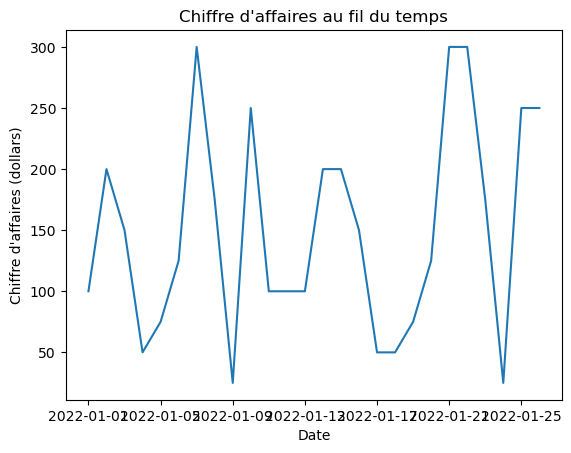

In [25]:
# Création d'un graphique montrant l'évolution du chiffre d'affaires au fil du temps
data['date'] = pd.to_datetime(data['date'])  # conversion de la colonne date en format datetime
revenue_by_date = data.groupby('date')['amount'].sum()  # calcul du chiffre d'affaires par date
plt.plot(revenue_by_date)
plt.title("Chiffre d'affaires au fil du temps")
plt.xlabel("Date")
plt.ylabel("Chiffre d'affaires (dollars)")
plt.show()
